# BLOC 1 :  SQL, RGPD, Web Scraping & API  _(1,5 heures)_

## SQL

> 1. **Compétence C1.3** Le schéma de la base de données ci-dessous représente plusieurs tables.
Il existe des relations entre ces tables. Etablissez les relations entre ses tables, en signifiant à chaque fois quelle est la clé primaire, la clé étrangère.

<img src="http://sc-e.fr/c075/c075sql.png" alt="img" width="400"/>

Exemple:

`Table1` --- `Table2`. Clé primaire: `Table2[nom_champ]` Clé étrangère: `Table1[nom_champ]`

Offering --- Classroom. Clé primaire: Classroom[classromm_id] Clé étrangère: Offering[classroom_id]
Offering --- Teachers. Clé primaire: Teachers[teachers_id] Clé étrangère: Offering[teachers_id]
Offering --- Courses. Clé primaire: Courses[course_id] Clé étrangère: Offering[course_id]

Grades --- Student. Clé primaire: Student[student_id] Clé étrangère: Grades[student_id]
Grades --- Courses. Clé primaire: Courses[course_id] Clé étrangère: Grades[course_id]

Les tables intermédiaires sont les tables Offering et Grades.

Une table intermédiaire est recommandée lorsque l'on souhaite connecter deux tables entre elles alors qu'elles
n'ont pas de clé commune. Alors nous pouvons réaliser des jointures.

3. Requêtes SQL

Exécuter la cellule de code ci-dessous pour se connecter à la base de données.

In [ ]:
import requests
import sqlite3
import pandas as pd

# Spécifiez l'URL du fichier SQL
sql_url = "http://sc-e.fr/c075/REV2_sql.sqlite"

# Téléchargez le fichier SQL
response = requests.get(sql_url)

if response.status_code == 200:
    # Enregistrez le contenu du fichier SQL dans une variable
    sql_content = response.text

    # Connexion à une nouvelle base de données (ou à une base de données existante)
    conn = sqlite3.connect("db_cbb.sqlite")

    # Créez un curseur pour exécuter les commandes SQL
    cursor = conn.cursor()

    try:
        # Exécutez le contenu du fichier SQL
        cursor.executescript(sql_content)
        print("Le fichier SQL a été importé avec succès.")

        # Validez les modifications dans la base de données
        conn.commit()

        # Exemple de requête pour récupérer tous les noms de tables
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()
        print("Tables dans la base de données :")
        for table in tables:
            print(table[0])

    except sqlite3.Error as e:
        print(f"Une erreur s'est produite lors de l'importation du fichier SQL : {e}")

else:
    print("Échec du téléchargement du fichier SQL depuis l'URL.")

Une erreur s'est produite lors de l'importation du fichier SQL : table courses already exists


In [ ]:
# Voici un exemple de requête sql. La requête SQL est entre guillemets pour le premier argument, puis la variable conn en second argument.

pd.read_sql("""select * from student""", conn)

,student_id,name,major
0,0,Paige Parker,Environmental Science
1,1,Emma Hamilton,Chemistry
2,2,Quinn Marshall,Engineering
3,3,Quinn King,Physics
4,4,Xena Patterson,Mathematics
...,...,...,...
995,995,Mia Thompson,Computer Science
996,996,Alice Freeman,Environmental Science
997,997,Violet Ross,Computer Science
998,998,Roxanne Howard,Mathematics


> 3.1 **Compétence C1.4** Quels sont les 3 enseignants qui proposent le plus de cours ?

Résultat attendu :

![img](http://sc-e.fr/c075/a1.jpg)

In [ ]:
pd.read_sql("""

SELECT
t.name as teacher_name,
COUNT(course_id) as nb_course

FROM teachers t

JOIN offering o ON t.teacher_id = o.teacher_id

GROUP BY t.name

ORDER BY nb_course DESC

LIMIT 3
""", conn)

,teacher_name,nb_course
0,Professor Wilson,15
1,Professor Moore,15
2,Professor Miller,13


> 3.2  Récupérez les noms de tous les étudiants inscrits dans au moins un cours enseigné par un enseignant comportant “Smith” dans son nom, et pour chaque étudiant, calculez le nombre de cours auxquels ils sont inscrits avec un enseignant dont le nom contient “Smith”.

Résultat attendu :

![img](http://sc-e.fr/c075/a2.jpg)

In [ ]:
pd.read_sql("""

SELECT
s.student_id,
s.name,
COUNT(t.name)

FROM student s

JOIN grades g ON s.student_id = g.student_id
JOIN courses c ON c.course_id = g.course_id
JOIN offering o ON o.course_id = c.course_id
JOIN teachers t ON o.teacher_id = t.teacher_id

WHERE t.name LIKE '%Smith%'

GROUP BY s.student_id

ORDER BY s.name ASC
""", conn)

,student_id,name,COUNT(t.name)
0,446,Alice Allen,1
1,163,Alice Bailey,1
2,204,Alice Bennett,1
3,355,Alice Bennett,3
4,107,Alice Brown,1
...,...,...,...
725,470,Zoe Perry,2
726,190,Zoe Price,2
727,438,Zoe Ross,2
728,146,Zoe Scott,1


> 3.3 **Compétence C1.1** On considère qu'un étudiant est en échec quand son 'grade' est strictement inférieur à 50.

Quels cours ont eu le plus d'étudiants en échec lors du dernier semestre de 2021 ?

Résultat attendu :

![img](http://sc-e.fr/c075/a3.jpg)

In [ ]:
pd.read_sql("""

SELECT
c.name,
COUNT(s.student_id) as nb_student

FROM grades g

JOIN courses c ON c.course_id = g.course_id
JOIN student s ON s.student_id = g.student_id

WHERE g.grade < 50 AND g.date > '2021-06-31'

GROUP BY c.name

ORDER BY COUNT(s.student_id) DESC
""", conn)

,name,nb_student
0,Biology II,8
1,Economics II,6
2,Computer Science I,6
3,Psychology I,5
4,Politics I,5
5,Physics I,5
6,Geology II,5
7,Computer Science III,5
8,Politics II,4
9,General Chemistry I,4


> 3.4. **Compétence C1.2** Quels cours ont eu le plus d'étudiants en échec lors des derniers semestres de 2021 et 2020 ?

Résultat attendu :

![img](http://sc-e.fr/c075/a5.jpg)

In [ ]:
pd.read_sql("""
WITH table_2021 AS (
              SELECT
              c.name,
              COUNT(s.student_id) as nb_student

              FROM grades g

              JOIN courses c ON c.course_id = g.course_id
              JOIN student s ON s.student_id = g.student_id

              WHERE g.grade < 50 AND g.date > '2021-06-31'

              GROUP BY c.name

              ORDER BY COUNT(s.student_id) DESC)

SELECT

c.name,
COUNT(s.student_id)+ t.nb_student as nb_student

FROM grades g

JOIN courses c ON c.course_id = g.course_id
JOIN student s ON s.student_id = g.student_id
JOIN table_2021 t ON t.name = c.name

WHERE g.grade < 50 AND g.date > '2020-06-31' AND g.date < '2021-01-01'

GROUP BY c.name

ORDER BY nb_student DESC
""", conn)

,name,nb_student
0,Computer Science II,11
1,Biology II,11
2,General Chemistry II,10
3,Computer Science I,10
4,Politics I,9
5,General Chemistry I,9
6,Physics I,8
7,Geology II,8
8,Environmental Science II,8
9,Computer Science III,8


## RGPD  


4: **Compétence C1.7** Dans le contexte de la base de données que nous venons d'utiliser (BD University), identifiez les données personnelles qui seraient soumises au RGPD. Proposez ensuite 5 mesures concrètes pour assurer la conformité RGPD de cette base de données.


Les données soumises au RGPD dans cette base de données seraient:
- Teachers name (le nom du professeur);
- Student name (le nom de l'étudiant);
- Building;
- Room_number;
- Nom du cours.

5 mesures pour assurer la conformité:
- Ne garder que les ID des étudiants, et ainsi retirer leurs noms;
- Ne garder que les ID des professeurs, et ainsi retirer leurs noms;
- Donner un ID spécifique à chaque building;
- Donner un ID spécifique à chaque classe;
- Donner un ID spécifique à chaque cours car ils peuvent également permettre de faire le lien avec les étudiants.

## Web Scraping

In [ ]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

5. **Compétence C1.5** Obtenir le titre et le chapeau (description) des derniers articles sur [https://www.lemonde.fr/actualite-en-continu/](https://www.lemonde.fr/actualite-en-continu/)

In [ ]:
navigator = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1)'
url_base = 'https://www.lemonde.fr/actualite-en-continu/'

html_title = requests.get(url_base, headers={'User-Agent': navigator})
html_title2 = html_title.content
soup_title = BeautifulSoup(html_title2, 'html.parser')

derniers_articles = {}
titres = []
descriptifs = []

for balise_parent in soup_title.find_all('h3', class_='teaser__title'):
  titres.append(balise_parent.text)

for balise_parent in soup_title.find_all('p', class_='teaser__desc'):
  descriptifs.append(balise_parent.text)

for n in range(len(titres)):
  derniers_articles.update({titres[n] : descriptifs[n]})

derniers_articles

{'«\xa0J’ai raté le concours d’entrée en médecine à deux reprises, et de très peu\xa0»\xa0: la Roumanie, patrie refuge pour les étudiants en médecine': 'Le pays accueille actuellement plus de 2\xa0600 étudiants français en médecine, qui ont pour la plupart échoué au concours d’entrée en France. S’ils ont souvent quitté leur pays avec le désir de revenir, à terme, y exercer, ils sont pourtant nombreux à poursuivre leur carrière à l’étranger.',
 'En direct, guerre en Ukraine\xa0: cinq morts et trente-huit blessés dans des bombardements russes à Izioum, dans l’Est': 'Kiev affirme avoir été attaqué par 65\xa0drones russes dans la nuit de lundi à mardi.',
 '«\xa0Les Sims\xa0» ont 25\xa0ans\xa0: que représente ce\xa0jeu vidéo pour vous\xa0? Venez en\xa0discuter avec nos journalistes': 'Le premier jeu des «\xa0Sims\xa0», développé par Maxis, est sorti le 4\xa0février\xa02000 sur PC. Depuis, la célèbre franchise n’a cessé de faire de nouveaux adeptes. Venez partager vos témoignages de joueur e

## API

**Compétence C1.6** Utilisez l'API publique "https://restcountries.com/v3.1/all" pour obtenir des informations sur les pays. Créez un DataFrame avec les colonnes `'name'`, `'capital'`, `'population'`, et `'area'` pour tous les pays. Puis, effectuez une analyse pour trouver les 5 pays les plus densément peuplés.

Documentation rapide :

- API : REST Countries
- Endpoint utilisé : https://restcountries.com/v3.1/all
- Description : Cette API permet d'obtenir des informations sur tous les pays du monde.
- Méthode HTTP : GET
- Paramètres : Aucun paramètre n'est nécessaire pour cet endpoint spécifique.
- Réponse : La réponse est un tableau JSON contenant des objets, chacun représentant un pays avec diverses informations.

In [ ]:
base_url = "https://restcountries.com/v3.1/all"
response = requests.get(base_url)

liste_index = []

for n in range(len(response.json())):
  liste_index.append(n)

countries = pd.DataFrame(index = liste_index, columns = ['Name', 'Capital', 'Population', 'Area', 'Density'])

for n in range(len(response.json())):

    countries.loc[n, 'Name'] = response.json()[n]['name']['common']

    countries.loc[n, 'Population'] = response.json()[n]['population']

    countries.loc[n, 'Area'] = response.json()[n]['area']

    countries.loc[n, 'Area'] = response.json()[n]['area']

    countries.loc[n, 'Density'] = int(response.json()[n]['population'] / response.json()[n]['area'])

    try:
      countries.loc[n, 'Capital'] = response.json()[n]['capital'][0]
    except:
      countries.loc[n, 'Capital'] = 'Unknown'

countries = countries.sort_values(by = 'Density', ascending = False).head()

countries = countries.drop('Density', axis = 1)

countries.head()

,Name,Capital,Population,Area
117,Macau,Unknown,649342,30.0
75,Monaco,Monaco,39244,2.02
42,Singapore,Singapore,5685807,710.0
170,Hong Kong,City of Victoria,7500700,1104.0
144,Gibraltar,Gibraltar,33691,6.0


# BLOC 2 : Pandas _(1,5 heures)_

Voici un dataset `df_cars` qui regroupe des références de voiture. L'objectif est de répondre à plusieurs questions.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_cars = pd.read_csv('http://sc-e.fr/c075/BD_c075.csv')

**Compétence C2.6** Gérez les valeurs manquantes (utilisez différentes stratégies selon les colonnes)


In [ ]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10000 non-null  int64  
 1   date_vente    10000 non-null  object 
 2   marque        10000 non-null  object 
 3   modele        10000 non-null  object 
 4   annee         10000 non-null  int64  
 5   kilometrage   9501 non-null   float64
 6   prix          9503 non-null   float64
 7   couleur       9800 non-null   object 
 8   carburant     10000 non-null  object 
 9   transmission  10000 non-null  object 
 10  etat          10000 non-null  object 
 11  num_serie     10000 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 937.6+ KB


In [ ]:
df_cars.describe()

,Unnamed: 0,annee,kilometrage,prix
count,10000.00000,10000.000000,9501.00000,9503.000000
mean,4999.50000,2007.422300,153948.33207,55553.975587
std,2886.89568,13.991338,105876.04616,74441.707946
min,0.00000,1990.000000,43.00000,1002.000000
25%,2499.75000,1998.000000,75646.00000,25723.000000
50%,4999.50000,2006.000000,149175.00000,50707.000000
75%,7499.25000,2015.000000,225410.00000,75757.500000
max,9999.00000,2123.000000,999999.00000,999999.000000


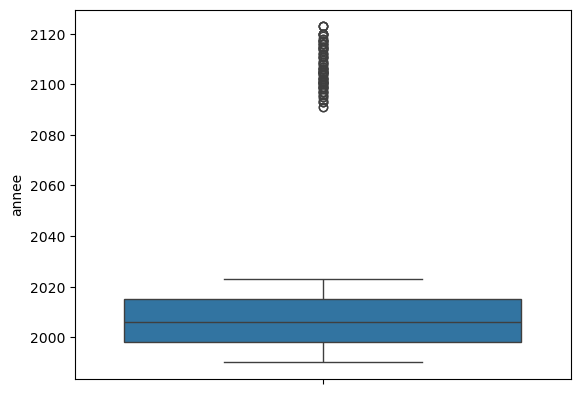

In [ ]:
sns.boxplot(df_cars['annee']);

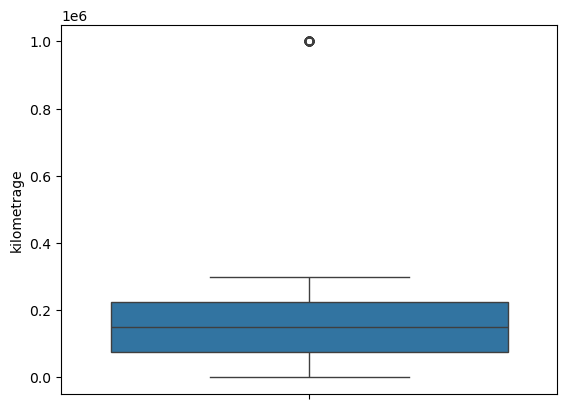

In [ ]:
sns.boxplot(df_cars['kilometrage']);

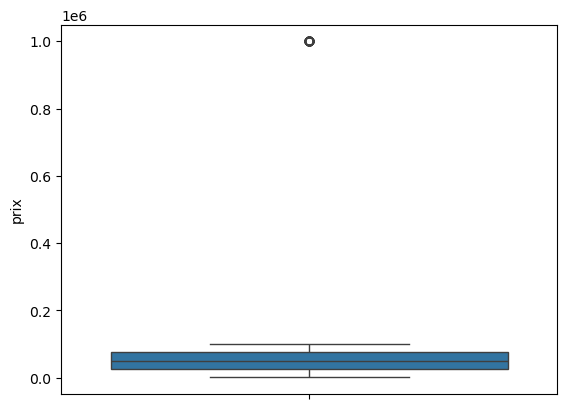

In [ ]:
sns.boxplot(df_cars['prix']);

In [ ]:
df_cars_nettoye = df_cars[
    (df_cars['prix'] < 400000)
    &
     (df_cars['kilometrage'] < 600000)
     &
      (df_cars['annee']< 2040)
      ]

In [ ]:
df_cars_nettoye = df_cars_nettoye[df_cars_nettoye['couleur'].isna() == False]

In [ ]:
df_cars_nettoye['date_vente'] = pd.to_datetime(df_cars_nettoye['date_vente'])
df_cars_nettoye['annee_vente'] = df_cars_nettoye['date_vente'].apply(lambda x : x.year)
df_cars_nettoye['mois_vente'] = df_cars_nettoye['date_vente'].apply(lambda x : x.month)
df_cars_nettoye = df_cars_nettoye.drop(['Unnamed: 0', 'num_serie'], axis = 1)

**Compétence C2.6 (deuxième chance)** Détectez et traitez les valeurs aberrantes

**Compétence C2.6 (troisième chance)** Corrigez les erreurs dans les données


**Compétence C2.5** Donnez le nombres de valeurs uniques de la colonne `'marque'`


In [ ]:
len(df_cars_nettoye['marque'].unique())

14

**Compétence C2.5** Créer une colonne `'age'` qui donne l'âge de la voiture aujourd'hui


In [ ]:
df_cars_nettoye['Age'] = 2025 - df_cars_nettoye['annee']

In [ ]:
df_cars_nettoye.head()

,date_vente,marque,modele,annee,kilometrage,prix,couleur,carburant,transmission,etat,annee_vente,mois_vente,Age
0,2020-01-01 00:00:00.000000000,Volkswagen,Citadine,2008,152473.0,94810.0,Noir,Diesel,Automatique,Occasion,2020,1,17
4,2020-01-01 11:57:46.066606660,Ford,SUV,2001,217065.0,80808.0,Rouge,Électrique,Manuelle,Reconditionné,2020,1,24
5,2020-01-01 14:57:12.583258325,Mercedes,SUV,2001,36555.0,15526.0,Gris,Électrique,Manuelle,Reconditionné,2020,1,24
8,2020-01-01 23:55:32.133213321,Honda,Citadine,2022,205801.0,81831.0,Gris,Hybride,Manuelle,Neuf,2020,1,3
9,2020-01-02 02:54:58.649864986,Ford,Berline,2007,231588.0,82089.0,Blanc,Essence,Manuelle,Occasion,2020,1,18


**Compétence C2.5** Selon le mois de vente, créer une colonne `'saison'` qui précise la saison où la voitoire a été vendue (`hiver - printemps - été - automne`)

In [ ]:
def saison(mois):
  if mois < 4:
    saison = 'Hiver'
  elif mois < 7:
    saison = 'Printemps'
  elif mois < 10:
    saison = 'Eté'
  else:
    saison = 'Automne'

  return saison

In [ ]:
df_cars_nettoye['saison_date_vente'] = df_cars_nettoye['mois_vente'].apply(saison)

In [ ]:
df_cars_nettoye.head()

,date_vente,marque,modele,annee,kilometrage,prix,couleur,carburant,transmission,etat,annee_vente,mois_vente,Age,saison_date_vente
0,2020-01-01 00:00:00.000000000,Volkswagen,Citadine,2008,152473.0,94810.0,Noir,Diesel,Automatique,Occasion,2020,1,17,Hiver
4,2020-01-01 11:57:46.066606660,Ford,SUV,2001,217065.0,80808.0,Rouge,Électrique,Manuelle,Reconditionné,2020,1,24,Hiver
5,2020-01-01 14:57:12.583258325,Mercedes,SUV,2001,36555.0,15526.0,Gris,Électrique,Manuelle,Reconditionné,2020,1,24,Hiver
8,2020-01-01 23:55:32.133213321,Honda,Citadine,2022,205801.0,81831.0,Gris,Hybride,Manuelle,Neuf,2020,1,3,Hiver
9,2020-01-02 02:54:58.649864986,Ford,Berline,2007,231588.0,82089.0,Blanc,Essence,Manuelle,Occasion,2020,1,18,Hiver


## Regex

**Compétence C2.7, Compétence C2.3** Utilisez la librairie `re` pour extraire les adresses mails du courriel ci-dessous à l'aide d'une fonction que vous devez créer.

In [ ]:
courriel = """Bonjour à tous,

Je vous écris pour vous informer des derniers développements de notre projet. Vous trouverez ci-dessous les coordonnées des membres de notre équipe pour toute question ou suggestion :

    Chef de projet : Jean Dupont - jean.dupont@example.com
    Responsable technique : Marie Lefèvre - marie.lefevre@example.com
    Développeur senior : Pierre Martin - pierre.martin@google.com
    Designer UX/UI : Sophie Moreau - sophie.moreau@ple.com
    Responsable marketing : Lucie Bernard - lucie.bernard@ex.com
    Support client : Antoine Dubois - antoine.dubois@example.com

Pour toute question générale, n'hésitez pas à nous contacter à l'adresse suivante : contact@example.com.

Merci de votre collaboration.

Cordialement,
L'équipe de gestion de projet"""

In [ ]:
def email(courriel):
  return re.findall('([A-Za-z]+.[A-Za-z]+@[A-Za-z]+.[A-Za-z]+)', courriel)

In [ ]:
email(courriel)

['jean.dupont@example.com',
 'marie.lefevre@example.com',
 'pierre.martin@google.com',
 'sophie.moreau@ple.com',
 'lucie.bernard@ex.com',
 'antoine.dubois@example.com',
 'contact@example.com']

## Méthode AGILE

Décrire la méthode AGILE et les différents rôles principaux.

La méthode AGILE est une méthode de gestion de projets qui doit normalement
améliorer la performance d'une équipe.

Rôles principaux:
- Product Owner: Il représente le client, prend les décisions et oriente le projet;
- Scrum Master: il est le garant de la méthode AGILE au sein de l'équipe;
- Equipe opérationnelle.

# BLOC 3 : Machine Learning _(3 heures)_

### Partie Machine Learning - Regression _(1 heure 30 minutes)_

En utilisant les données nettoyées de voitures, construisez un modèle de machine learning pour prédire le **prix** des véhicules.

Suivez ces étapes :

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
def encodage_X(X, type='standard'):
  index = X.index
  X_num = X.select_dtypes('number')
  X_cat = X.select_dtypes(['object', 'category', 'string'])

  if type == 'standard':
    from sklearn.preprocessing import StandardScaler
    SN = StandardScaler()
    X_num_SN = pd.DataFrame(SN.fit_transform(X_num), columns=X_num.columns, index=index)

  else:
    from sklearn.preprocessing import MinMaxScaler
    SN = MinMaxScaler()
    X_num_SN = pd.DataFrame(SN.fit_transform(X_num), columns=X_num.columns, index=index)

  X_cat_dummies = pd.get_dummies(X_cat)
  X_encoded = pd.concat([X_num_SN, X_cat_dummies], axis=1)

  return X_encoded, SN

a) Préparez les données pour le modèle (encodage des variables catégorielles, normalisation, etc.)

In [ ]:
X = df_cars_nettoye.drop(['prix', 'date_vente'], axis = 1)
y = df_cars_nettoye['prix']

In [ ]:
X_encoded, SN = encodage_X(X)

b) Divisez les données en ensembles d'entraînement et de test (80-20)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, train_size = 0.8, random_state=13)

c) Entraînez et comparez au moins trois modèles différents (par exemple : régression linéaire, Random Forest, Gradient Boosting)


In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

print(f"Score d'entrainement {model.score(X_train, y_train)}")
print(f"Score de test {model.score(X_test, y_test)}")

Score d'entrainement 0.0054833353191784395
Score de test -0.0005522233419956724


In [ ]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

print(f"Score d'entrainement {model.score(X_train, y_train)}")
print(f"Score de test {model.score(X_test, y_test)}")

Score d'entrainement 1.0
Score de test 0.0


In [ ]:
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:7000], X[7000:]
y_train, y_test = y[:7000], y[7000:]

model = GradientBoostingClassifier()

model.fit(X_train, y_train)

print(f"Score d'entrainement {model.score(X_train, y_train)}")
print(f"Score de test {model.score(X_test, y_test)}")

Score d'entrainement 0.9515714285714286
Score de test 0.9126


d) Utilisez la validation croisée pour évaluer la performance des modèles


In [ ]:
X = df_cars_nettoye.drop(['prix', 'date_vente'], axis = 1)
y = df_cars_nettoye['prix']

X_encoded, SN = encodage_X(X)

models = [
    LinearRegression(),
    RandomForestClassifier(),
]

param_grids = [
    {'fit_intercept': [True, False], 'positive': [True, False]},
    {'n_estimators': [100, 200], 'max_depth': [10, 20], 'max_features': ['sqrt', 'log2']},
]

df_reponse = pd.DataFrame(index = [1, 2], columns = ['Model', 'Score', 'Paramètres'])
df_reponse['Model'] = models

for model, param_grid in zip(models, param_grids):
    gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)
    gs.fit(X_encoded, y)
    df_reponse.loc[df_reponse['Model'] == model,'Score'] = f"{gs.best_score_:.3f}"
    df_reponse.loc[df_reponse['Model'] == model,'Paramètres'] = f"{gs.best_params_}"

df_reponse

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
4 fits failed out of a total of 8.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py", line 611, in fit
    self.coef_ = o

,Model,Score,Paramètres
1,LinearRegression(),-0.005,"{'fit_intercept': True, 'positive': False}"
2,RandomForestClassifier(),0.000,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e..."


In [ ]:
X = df_cars_nettoye.drop(['prix', 'date_vente'], axis = 1)
y = df_cars_nettoye['prix']

X, y = make_hastie_10_2(random_state=0)

models = [
    GradientBoostingClassifier()
]

param_grids = [
    {'n_estimators': [100, 200], 'learning_rate' : [0.01, 0.1, 1.0], 'max_depth' : [1, 10]},
]

df_reponse = pd.DataFrame(index = [1], columns = ['Model', 'Score', 'Paramètres'])
df_reponse['Model'] = models

for model, param_grid in zip(models, param_grids):
    gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
    gs.fit(X, y)
    df_reponse.loc[df_reponse['Model'] == model,'Score'] = f"{gs.best_score_:.3f}"
    df_reponse.loc[df_reponse['Model'] == model,'Paramètres'] = f"{gs.best_params_}"

df_reponse

,Model,Score,Paramètres
1,GradientBoostingClassifier(),0.947,"{'learning_rate': 1.0, 'max_depth': 1, 'n_esti..."


e) Sélectionnez le meilleur modèle et interprétez ses résultats


Le meilleur modèle semble être le GradientBoostingClassifier, car il a des scores élevés sur les train et test split et que ces scores sont proches.

f) Décrire, en détails, les types de score qui peuvent être utilisés lors d'une régression

Concernant les régressions, les types de score recherchés sont ceux qui seront élevés et dont le score d'entrainement et de test seront proches.
Si le score n'est pas élevé, alors le modèle n'est pas pertinent.
Si les scores ont une différence important entre l'entrainement et le reste, alors le modèle n'est pas pertinent non plus.

g) Expliquer en détails le fonctionnement de la regression linéaire. Que va chercher / trouver le modèle ? Cela correspond à quoi mathématiquement ?

Une régression linéaire va rechercher, dans le dataset, une corrélation entre différentes variables et la valeur recherchée.
Ce peut être une corrélation positive ou négative.
Selon l'évolution des critères, le modèle pourra analyser la corrélation pour prédire les valeurs recherchées.

### Partie Machine Learning - Classification _(1 heure 30 minutes)_

En utilisant les données nettoyées de voitures, construisez un modèle de machine learning pour prédire le modèle des véhicules.

Suivez ces étapes :

a) Préparez les données pour le modèle (encodage des variables catégorielles, normalisation, etc.)

In [ ]:
X = df_cars_nettoye.drop(['modele', 'date_vente'], axis = 1)
y = df_cars_nettoye['modele']

In [ ]:
X_encoded, SN = encodage_X(X)

b) Divisez les données en ensembles d'entraînement et de test (80-20)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, train_size = 0.8, random_state= 13)

c) Entraînez et comparez au moins trois modèles différents (par exemple : régression linéaire, Random Forest, Gradient Boosting)


In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

print(f"Score d'entrainement {model.score(X_train, y_train)}")
print(f"Score de test {model.score(X_test, y_test)}")

In [ ]:
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:7000], X[7000:]
y_train, y_test = y[:7000], y[7000:]


model = GradientBoostingClassifier()

model.fit(X_train, y_train)

print(f"Score d'entrainement {model.score(X_train, y_train)}")
print(f"Score de test {model.score(X_test, y_test)}")

Score d'entrainement 0.9515714285714286
Score de test 0.9126


In [ ]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

print(f"Score d'entrainement {model.score(X_train, y_train)}")
print(f"Score de test {model.score(X_test, y_test)}")

Score d'entrainement 1.0
Score de test 0.8906


d) Utilisez la validation croisée pour évaluer la performance des modèles


In [ ]:
X = df_cars_nettoye.drop(['modele', 'date_vente'], axis = 1)
y = df_cars_nettoye['modele']

X_encoded, SN = encodage_X(X)

models = [
    LinearRegression(),
    RandomForestClassifier(),
]

param_grids = [
    {'fit_intercept': [True, False], 'positive': [True, False]},
    {'n_estimators': [100, 200], 'max_depth': [10, 20], 'max_features': ['sqrt', 'log2']},
]

df_reponse = pd.DataFrame(index = [1, 2], columns = ['Model', 'Score', 'Paramètres'])
df_reponse['Model'] = models

for model, param_grid in zip(models, param_grids):
    gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)
    gs.fit(X_encoded, y)
    df_reponse.loc[df_reponse['Model'] == model,'Score'] = f"{gs.best_score_:.3f}"
    df_reponse.loc[df_reponse['Model'] == model,'Paramètres'] = f"{gs.best_params_}"

df_reponse

In [ ]:
X = df_cars_nettoye.drop(['modele', 'date_vente'], axis = 1)
y = df_cars_nettoye['modele']

X, y = make_hastie_10_2(random_state=0)

models = [
    GradientBoostingClassifier()
]

param_grids = [
    {'n_estimators': [100, 200], 'learning_rate' : [0.01, 0.1, 1.0], 'max_depth' : [1, 10]},
]

df_reponse = pd.DataFrame(index = [1], columns = ['Model', 'Score', 'Paramètres'])
df_reponse['Model'] = models

for model, param_grid in zip(models, param_grids):
    gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
    gs.fit(X, y)
    df_reponse.loc[df_reponse['Model'] == model,'Score'] = f"{gs.best_score_:.3f}"
    df_reponse.loc[df_reponse['Model'] == model,'Paramètres'] = f"{gs.best_params_}"

df_reponse

e) Sélectionnez le meilleur modèle et interprétez ses résultats


Le meilleur modèle semble être le GradientBoostingClassifier, car il a des scores élevés sur les train et test split et que ces scores sont proches.

f) Décrire, en détails, les types de score qui peuvent être utilisés lors d'uné classification

Lors d'une classification, nous regarderons les scores sur les train et les test split. Nous regarderons également les n neighbours qui permettront d'être au plus juste lors de la classification.

# BLOC 4 : Étude de marché - Immobilier (6 heures)

La société "DataImmo", un cabinet de conseil spécialisé dans l'analyse du marché immobilier français, vous a recruté en tant que Data Analyst pour créer un tableau de bord interactif destiné à leurs clients investisseurs et aux agences immobilières.

DataImmo a collecté une base de données substantielle contenant 20 000 transactions immobilières réparties dans cinq grandes villes françaises : Paris, Lyon, Marseille, Bordeaux et Lille. Ces données couvrent la période de janvier 2018 à mai 2023 et comprennent une variété d'informations sur chaque bien :

- Identifiant unique, ville, arrondissement
- Type de bien (Appartement, Maison, Studio, Loft)
- Caractéristiques du bien (surface, nombre de chambres, salles de bain, étage)
- Équipements (ascenseur, balcon, parking)
- Année de construction
- Prix et prix au m²
- Performance énergétique (DPE)
- Date de vente
- Adresse et coordonnées géographiques

Votre mission est de créer un tableau de bord interactif complet qui permettra aux utilisateurs d'explorer ces données de manière intuitive et d'en tirer des insights pertinents. Le tableau de bord devra inclure :

- Une vue d'ensemble du marché immobilier dans les cinq villes, avec des indicateurs clés tels que le prix moyen, le prix au m² moyen, et le nombre de transactions.
- Des visualisations interactives permettant de comparer les tendances entre les villes, les types de biens, et les périodes.
- Une carte interactive montrant la répartition géographique des biens et leurs prix.
- Des filtres permettant aux utilisateurs de sélectionner des sous-ensembles spécifiques de données (par ville, type de bien, fourchette de prix, etc.).
- Des analyses de l'évolution des prix dans le temps pour chaque ville.
- Des visualisations montrant l'impact des différentes caractéristiques (surface, nombre de chambres, présence d'un ascenseur, etc.) sur les prix.
- Une analyse de la performance énergétique des biens et son influence sur les prix.
- Des indicateurs de l'état du marché, comme le délai de vente moyen ou le ratio prix de vente/prix demandé (à estimer à partir des données disponibles).

Votre tableau de bord devra être conçu pour répondre à des questions telles que :

- Quelles sont les zones les plus chères et les moins chères dans chaque ville ?
- Comment les prix ont-ils évolué au fil du temps dans les différentes villes ?
- Quel est l'impact de la présence d'un balcon ou d'un parking sur le prix des biens ?
- Y a-t-il une corrélation entre l'année de construction et le prix ou la performance énergétique ?
- Quels types de biens offrent le meilleur rapport qualité-prix dans chaque ville ?

En plus du tableau de bord, vous devrez fournir un rapport écrit détaillant :
1. Votre processus de nettoyage et de préparation des données
2. Les principales tendances et patterns identifiés dans les données
3. Les défis rencontrés lors de la création du tableau de bord et comment vous les avez surmontés
4. Des recommandations pour les investisseurs basées sur vos analyses

Ce projet permettra à DataImmo de fournir à ses clients un outil puissant pour analyser le marché immobilier français et prendre des décisions d'investissement éclairées.

**Attention, vous vous adressez à un client et non à une personne qui s'y connait en code**

## Données :

In [ ]:
import pandas as pd

df_immo = pd.read_csv('http://sc-e.fr/c075/immo_db075.csv')

In [ ]:
df_immo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          20000 non-null  int64  
 1   id                  20000 non-null  int64  
 2   ville               20000 non-null  object 
 3   arrondissement      20000 non-null  int64  
 4   type                20000 non-null  object 
 5   surface             19000 non-null  float64
 6   chambres            20000 non-null  int64  
 7   salle_de_bain       20000 non-null  int64  
 8   etage               20000 non-null  int64  
 9   ascenseur           20000 non-null  bool   
 10  balcon              20000 non-null  bool   
 11  parking             20000 non-null  bool   
 12  annee_construction  20000 non-null  int64  
 13  prix                19000 non-null  float64
 14  prix_m2             20000 non-null  int64  
 15  DPE                 20000 non-null  object 
 16  date

In [ ]:
df_immo = df_immo[~((df_immo['prix'].isna()) & (df_immo['surface'].isna()))]

In [ ]:
df_immo[['prix', 'surface']] = df_immo[['prix', 'surface']].fillna(0)
df_immo['prix_calcule'] = df_immo.apply(lambda x : x['prix_m2'] * x['surface'] if x['prix'] == 0 else x['prix'], axis = 1)
df_immo['surface_calculee'] = df_immo.apply(lambda x : x['prix'] / x['prix_m2'] if x['surface'] == 0 else x['surface'], axis = 1)

In [ ]:
df_immo['tranche_prix'] = pd.cut(df_immo['prix_calcule'], bins = [0, 100000, 500000, 1000000, 1500000, 2000000, 2500000, 5000000, 10000000, 1000000000])
df_immo['tranche_prix'] = df_immo['tranche_prix'].astype(str)
df_immo['tranche_prix'] = df_immo['tranche_prix'].apply(lambda x : x.replace('(', '').replace(']', '').replace(', ', ' - '))

In [ ]:
df_immo['tranche_surface'] = pd.cut(df_immo['surface_calculee'], bins = [0, 50, 100, 150, 200, 250, 300, 500, 750, 1000])
df_immo['tranche_surface'] = df_immo['tranche_surface'].astype(str)
df_immo['tranche_surface'] = df_immo['tranche_surface'].apply(lambda x : x.replace('(', '').replace(']', '').replace(', ', ' - '))

In [ ]:
df_immo.to_csv('df_immo_power_bi.csv')